### Aplicação - ( CLUSTERING )  - KMeans

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

from sklearn import cluster, datasets

In [32]:
# Lendo o dataset
url = 'Iris.csv'
dados = pd.read_csv( url )

### Análise dos Dados

### Pair-Plot - Seaborn

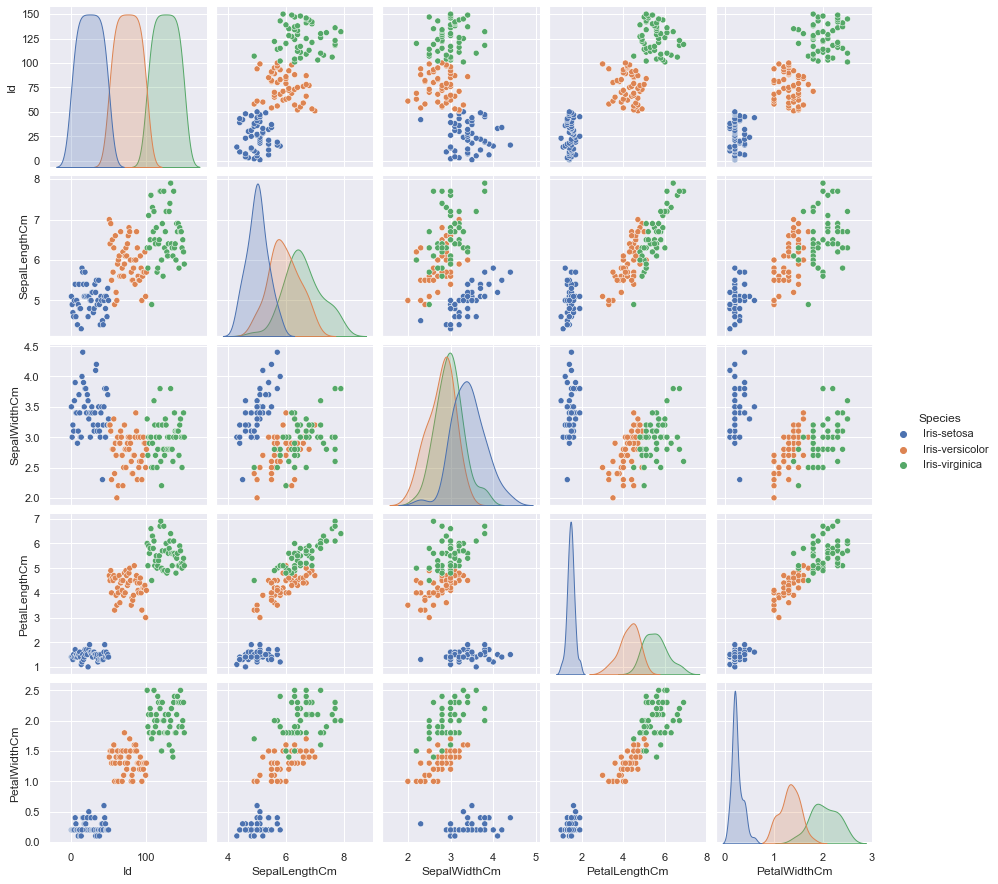

In [34]:
sns.pairplot( dados, hue = 'Species' )
plt.show()

In [ ]:
dados2D = dados[ ['SepalLengthCm', 'SepalWidthCm'] ]
dados2D

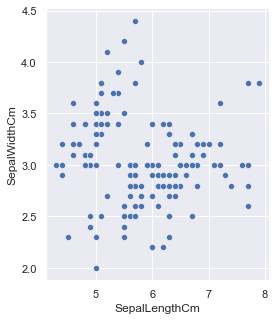

In [40]:
fig, axe = plt.subplots( figsize = ( 4,5 ) )
axe = sns.scatterplot( data = dados2D, x = 'SepalLengthCm', y = 'SepalWidthCm' )
plt.show()

### KMeans

In [41]:
kmeans = cluster.KMeans( n_clusters=3)
clusters = kmeans.fit_predict( dados2D )

In [42]:
pd.value_counts( clusters )

2    53
0    50
1    47
dtype: int64

In [43]:
# Obter as coordenadas x, y dos centróides
x_centroide, y_centroide = kmeans.cluster_centers_[ : , 0], kmeans.cluster_centers_[ : , 1]

print( 'x = ', x_centroide )
print( 'y = ', y_centroide )

x =  [5.006      6.81276596 5.77358491]
y =  [3.418      3.07446809 2.69245283]


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

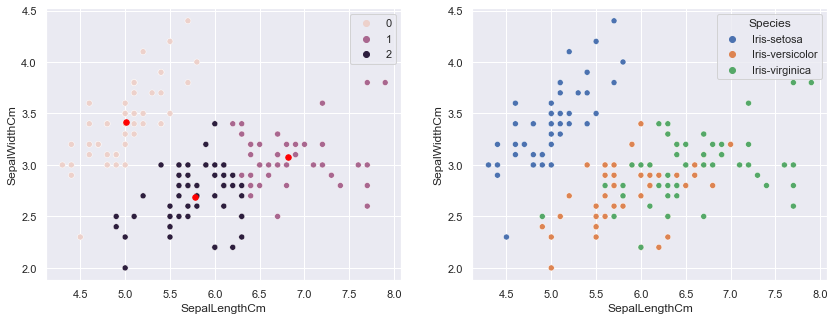

In [47]:
# ( criação da figura - fig ) ( axe1 e axe2 ) ( subplots com 1 linha e 2 colunas ) ( figura de tamanho 14 x 5 )
fig, ( axe1, axe2 ) = plt.subplots( 1, 2, figsize=(14,5))

# ***************************
# Gráfico à Esquerda ( axe1 )
# ***************************
sns.scatterplot( data = dados2D, x = 'SepalLengthCm', y = 'SepalWidthCm', hue=clusters, ax=axe1)
axe1.scatter( x = x_centroide, y = y_centroide, s = 30, color = 'red' )

# ***************************
# Gráfico à Esquerda ( axe2 )
# ***************************
sns.scatterplot( data = dados, x = 'SepalLengthCm', y = 'SepalWidthCm', hue='Species', ax=axe2)


In [61]:
# Importando Imagem
url = 'Flor.jpg'
imagem = plt.imread( url )

# Definindo algumas funções
def imprimir_imagem( imagem ):
    plt.axis('off')
    plt.imshow( imagem )

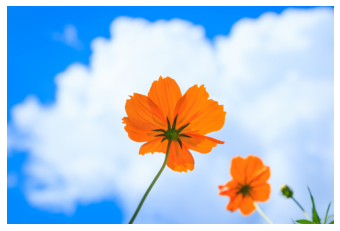

In [62]:
# print image
imprimir_imagem( imagem )

In [63]:
imagem.shape

(836, 1254, 3)

In [ ]:
print( imagem )

In [65]:
imagem_vetorial = np.reshape( imagem, (836 * 1254, 3))

In [67]:
pixel_df = pd.DataFrame( imagem_vetorial, columns=['Red', 'Green', 'Blue'])
pixel_df

,Red,Green,Blue
0,0,131,250
1,0,132,251
2,0,133,252
3,0,133,251
4,0,132,250
...,...,...,...
1048339,83,136,2
1048340,85,137,1
1048341,85,137,0
1048342,86,140,2


In [81]:
from sklearn.cluster import KMeans

modelo_kmeans = cluster.KMeans( n_clusters=3 )
clusters_img = kmeans.fit_predict( imagem_vetorial )

In [82]:
pd.value_counts( clusters_img )

1    699437
0    220015
2    128892
dtype: int64

In [83]:
clusters_img.shape

(1048344,)

In [84]:
clustered_imagem = np.reshape( clusters_img, ( 836, 1254 ))

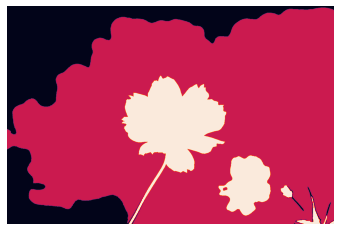

In [85]:
plt.imshow( clustered_imagem )
plt.axis( 'off' )
plt.show()